In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [2]:
def process_stock_data(ticker, start, end):
    data = yf.download(ticker, start = start, end = end)
    return data["Close"]

In [3]:
def arima_model(closing_prices):
    fit = ARIMA(closing_prices, order = (5, 1, 0)).fit()
    return fit.predict(typ="levels")

In [4]:
def plot_data(actual, predicted, title):
    plt.figure(figsize = (10, 4))
    plt.plot(actual, label = "Original")
    plt.plot(predicted, label = "Predicted", color = "red")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.show()
    
    

In [5]:
def compute_mape(actual, predicted):
    mape = mean_absolute_error(actual, predicted)/len(actual) * 100
    return round(mape, 2)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashwi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date 

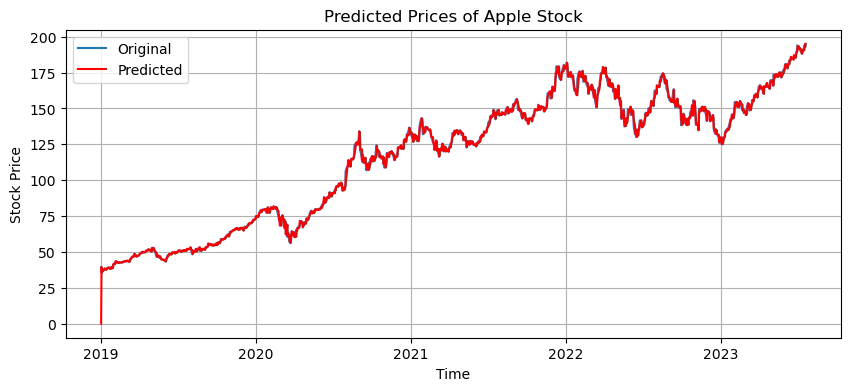

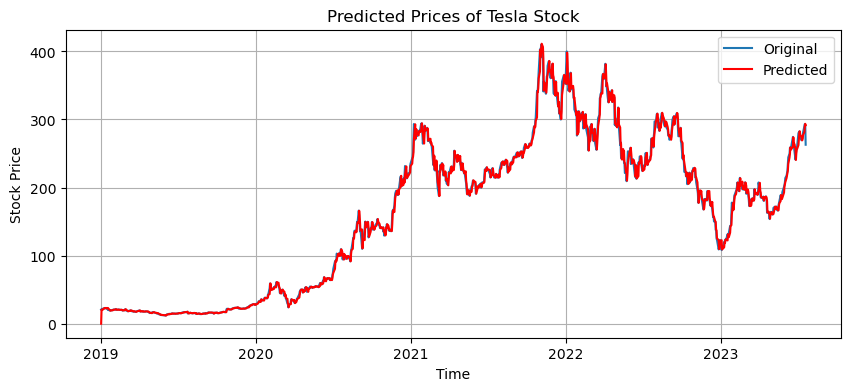

Apple MAPE: 0.15

Tesla MAPE: 0.42



In [6]:
start = "2019-01-01"
end = "2023-07-21"

closing_apple = process_stock_data("AAPL", start, end)
closing_tesla = process_stock_data("TSLA", start, end)

apple_fit = arima_model(closing_apple)
tesla_fit = arima_model(closing_tesla)

plot_data(closing_apple, apple_fit, "Predicted Prices of Apple Stock")
plot_data(closing_tesla, tesla_fit, "Predicted Prices of Tesla Stock")

apple_mape = compute_mape(closing_apple, apple_fit)
tesla_mape = compute_mape(closing_tesla, tesla_fit)

print(f"Apple MAPE: {apple_mape}\n")
print(f"Tesla MAPE: {tesla_mape}\n")